In [1]:
# Such that changes in external libraries get updated
%load_ext autoreload
%autoreload 2

import sys
# External functions for parsing full-wave solver output (and Mithra output)
sys.path.append('/home/arnau/documents/ETHZ/MScThesis/plotMithraPy')
import plotMiFuncs as pmf
sys.path.append('/home/arnau/documents/ETHZ/MScThesis/pyOPALTools')
from opal.parser.H5Parser import H5Parser

import matplotlib.pyplot as plt

# Such that backgrounds of plots are white and not transparent
import matplotlib as mpl
mpl.rcParams["figure.facecolor"] = "white"
mpl.rcParams["axes.facecolor"] = "white"
mpl.rcParams["savefig.facecolor"] = "white"

from datetime import date
import numpy as np
import pandas as pd
import os

raw_data = []

###########################################################################################
###########################################################################################
# Instantiate basic stuff
fs = 16
footnote = 'Albà, ' + str(date.today())
for_report = True
pltpath = 'tests/plots'

raw_data.append( ['tests/testOPAL', 'Test latest version, OPAL emitted, dz = 70 nm, N = 5e5' ] )
raw_data.append( ['tests/AprilTest', 'April, my latest version, OPAL emitted, dz = 70 nm, N = 5e5' ] )
raw_data.append( ['tests/MayTest', "May, Arya's latest versiont OPAL emitted, dz = 70 nm, N = 5e5" ] )
# raw_data.append( ['tests/new_emitted', 'OPAL emitted, dz = 100 nm, N = 5e5' ] )
# raw_data.append( ['tests/new_emitted_5e4', 'OPAL emitted, dz = 100 nm, N = 5e4' ] )
# raw_data.append( ['tests/latest_emitted_5e4', 'latest emitted, dz = 100 nm, N = 5e4' ] )
# raw_data.append( ['tests/twocoretest', 'OPAL emitted, dz = 100 nm, N = 5e5' ] )
# raw_data.append( ['tests/injectTestRemove', 'OPAL injected, dz = 100 nm, N = 5e5' ] )

###########################################################################################
###########################################################################################

leg = []
fnames = []
for i in raw_data:
    fnames.append( i[0])
    leg.append( i[1] )

print(footnote)
# Create folder for plots if it doesn't exist
if not os.path.exists(pltpath):
    os.mkdir(pltpath)
    print("Created folder " + pltpath)


Albà, 2021-12-03


# Old plots

In [ ]:
stats = []     
for i, fname in enumerate(fnames):
    print(i)
    stats.append( pmf.importStat( fname + '/bunch-sampling/bunch.txt', show = True) )

names = [ 'z', 'sig_z', 'x', 'sig_x', 'y', 'sig_y',
             'pz', 'sig_pz', 'px', 'sig_px', 'py', 'sig_py']

fig, axs = plt.subplots( 6,2, figsize = ( 12, 20 ), sharex = True )
dotted = [0,1]  # Indexes from fnames to plot with dotted lines
Ls = [1.8e-3, 4e-3, .1e-3]  # Limits of copmutationsl domain
Ls[2] *= 212.35  # * gamma_
notPlot = []  # Indexes from fnames not to plot
legLocal = []
for i, ax in enumerate(axs.reshape(-1)):
    for j, stat in enumerate(stats):
        if j in notPlot:
            continue
        if j in dotted:
            ls = ':'
            lw = 3
        else:
            ls = '-'
            lw = 2
        pmf.plotStat(ax, stat, quants = ['t',names[i]], factors = [1, 1], lw = lw, ls = ls )
        legLocal.append(leg[j])
        # if int(i/10) == 0:
        #     ax.set_xlabel('')
axs[1,1].legend(legLocal, fontsize = fs, bbox_to_anchor = [1., 1.])
# Draw copmutational mesh limits
for j in range(3):
    i  = (2 + j) % 3
    print(-.5 * Ls[i], .5 * Ls[i])
    axs[j,0].axhline(-.5 * Ls[i], lw = 2, color = 'r')
    axs[j,0].axhline(.5 * Ls[i], lw = 2, color = 'r')
    axs[j,0].set_ylim(bottom = -.5 * Ls[i], top = .5 * Ls[i])
if not for_report:
    fig.text(.7, .04, footnote, fontsize = fs, ha='center')
plt.savefig((pltpath + '/avg.png'),bbox_inches='tight')
plt.show()


In [10]:
# Get screen data
r_data = raw_data[0]
[data, screens] = pmf.importScreen( r_data[0] + '/bunch-profile/bunch-p#-screen#.txt', show = True )


columns =  ['x', 'y', 't', 'px', 'py', 'pz']
Number of screens =  2 , number of processors =  16
0 tests/testOPAL/bunch-profile/bunch-p#-screen0.txt
1 tests/testOPAL/bunch-profile/bunch-p#-screen1.txt
Screens at  [0, 1]


In [3]:
# Plot all screens for one folder
if len(screens) > 1:
    fig, ax = plt.subplots( len(screens), 1, figsize = ( 16, 8*len(screens) ), sharey = False, sharex = False )
    ax = ax.reshape(-1)
    for i in range(len(screens)):
        ax[i].grid()
        [x,y] = pmf.plotScreen( ax[i], data, ['t', 'E'], screenNum = i, type = 'hist2d', factors = [-1e15,1e-9], nbins = 250, color = 1, lw = 3, fs = 20)
        # ax[i].text(1.25, .5, 's = ' + str(screens[i]), fontsize = fs, transform = ax[i].transAxes)
    pmf.adjust_axes_limits( ax, 'x' )
    pmf.adjust_axes_limits( ax, 'y' )
else:
    fig, ax = plt.subplots( 1, 1, figsize = ( 10, 4 ), sharey = False, sharex = False )
    [x,y] = pmf.plotScreen( ax, data, ['t', 'y'], screenNum = 0, type = 'mod', factors = [-1e12,1e-6], nbins = 500, color = 1, fs = 85)

print('num particles = ', len(x))        
# fig.suptitle(r_data[0] + ', ' + r_data[1], fontsize = fs)
plt.savefig( (pltpath + '/befAft_noLetters.png'), bbox_inches='tight' )    
plt.show()

NameError: name 'screens' is not defined

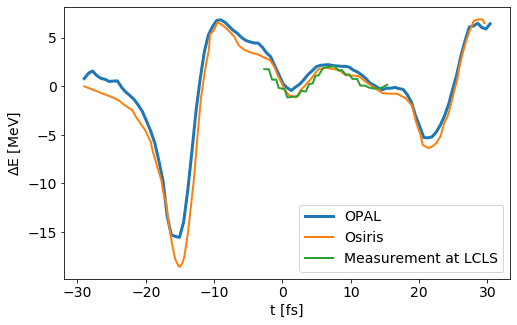

In [12]:
# Plot modulation of end screen
fig, ax = plt.subplots(figsize = ( 8, 5 ), sharey = False, sharex = False )
[x,y] = pmf.plotScreen( ax, data, ['t', 'E'], screenNum = 1, type = 'mod', factors = [-1e15,1e-6], nbins = 100, color = 1, lw = 3)
# Plot data from paper
osiris = pd.read_csv('paper/Osiris.csv', names = ['t', 'dE'])
osiris = osiris.sort_values( by = ['t']  )
meas = pd.read_csv('paper/Measurement.csv', names = ['t', 'dE'])
meas = meas.sort_values( by = ['t']  )
shift = 29  # Shift data horizontally because I don't understand the convention to choose the center in the paper
ax.plot(osiris['t'] - shift, osiris['dE'], lw = 2)
ax.plot(meas['t'] - shift, meas['dE'], lw = 2)
# ax.scatter(meas['t'] - shift, meas['dE'], s = 40, marker = 'o', color = 'k')
ax.legend(['OPAL', 'Osiris', 'Measurement at LCLS'], fontsize = fs)

plt.savefig( (pltpath + '/comparisonThesis.png'), bbox_inches='tight' )    
plt.show()

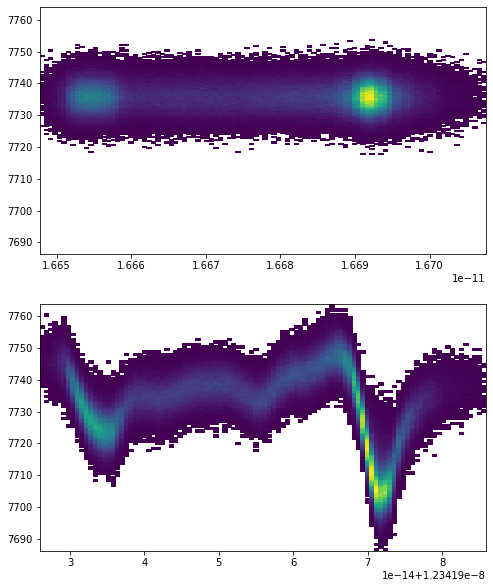

In [3]:
h5p = H5Parser()
fig, axs = plt.subplots(2, figsize = (8, 10), sharex = False, sharey = True)
h5p.parse('tests/testOPAL/SCREEN1.h5', False)
x =  h5p.getStepDataset( dsetName = 'time', step = 0)
y =  h5p.getStepDataset( dsetName = 'pz', step = 0)
axs[0].hist2d(x, y, bins = 100, cmin = 1)
h5p.parse('tests/testOPAL/SCREEN2.h5', False)
x =  h5p.getStepDataset( dsetName = 'time', step = 0)
y =  h5p.getStepDataset( dsetName = 'pz', step = 0)
axs[1].hist2d(x, y, bins = 100, cmin = 1)
plt.show()


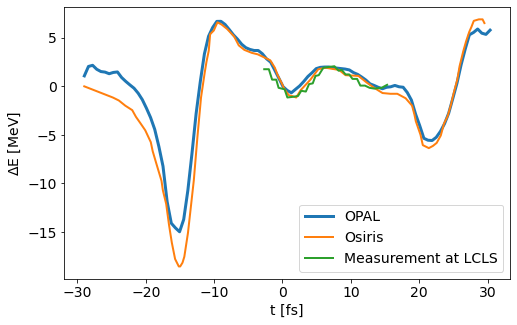

In [4]:
# Plot modulation of end screen
h5p = H5Parser()
h5p.parse('tests/testOPAL/SCREEN2.h5', False)
x = h5p.getStepDataset( dsetName = 'time', step = 0)
y = np.array(h5p.getStepDataset( dsetName = 'px', step = 0))**2
y += np.array(h5p.getStepDataset( dsetName = 'py', step = 0))**2
y += np.array(h5p.getStepDataset( dsetName = 'pz', step = 0))**2
mc2 = .511 * 1e6
y = mc2 * np.sqrt(1 + y)

fig, ax = plt.subplots(figsize = ( 8, 5 ), sharey = False, sharex = False )
pmf.plotScreenXY( ax, x, y, ['t', 'E'], type = 'mod', factors = [-1e15,1e-6], nbins = 100, color = 1, lw = 3)
# Plot data from paper
osiris = pd.read_csv('paper/Osiris.csv', names = ['t', 'dE'])
osiris = osiris.sort_values( by = ['t']  )
meas = pd.read_csv('paper/Measurement.csv', names = ['t', 'dE'])
meas = meas.sort_values( by = ['t']  )
shift = 29  # Shift data horizontally because I don't understand the convention to choose the center in the paper
ax.plot(osiris['t'] - shift, osiris['dE'], lw = 2)
ax.plot(meas['t'] - shift, meas['dE'], lw = 2)
# ax.scatter(meas['t'] - shift, meas['dE'], s = 40, marker = 'o', color = 'k')
ax.legend(['OPAL', 'Osiris', 'Measurement at LCLS'], fontsize = fs)

# plt.savefig( (pltpath + '/comparisonThesis.png'), bbox_inches='tight' )    
plt.show()

tests/testOPAL/macArthur.stat
0 t  [ ns ]
1 s  [ m ]
2 numParticles  [   ]
3 charge  [   ]
4 energy  [ MeV ]
5 rms_x  [ m ]
6 rms_y  [ m ]
7 rms_s  [ m ]
8 rms_px  [   ]
9 rms_py  [   ]
10 rms_ps  [   ]
11 emit_x  [ m ]
12 emit_y  [ m ]
13 emit_s  [ m ]
14 mean_x  [ m ]
15 mean_y  [ m ]
16 mean_s  [ m ]
17 ref_x  [ m ]
18 ref_y  [ m ]
19 ref_z  [ m ]
20 ref_px  [   ]
21 ref_py  [   ]
22 ref_pz  [   ]
23 max_x  [ m ]
24 max_y  [ m ]
25 max_s  [ m ]
26 xpx  [   ]
27 ypy  [   ]
28 zpz  [   ]
29 Dx  [ m ]
30 DDx  [   ]
31 Dy  [ m ]
32 DDy  [   ]
33 Bx_ref  [ T ]
34 By_ref  [ T ]
35 Bz_ref  [ T ]
36 Ex_ref  [ MV/m ]
37 Ey_ref  [ MV/m ]
38 Ez_ref  [ MV/m ]
39 dE  [ MeV ]
40 dt  [ ns ]
41 partsOutside  [   ]


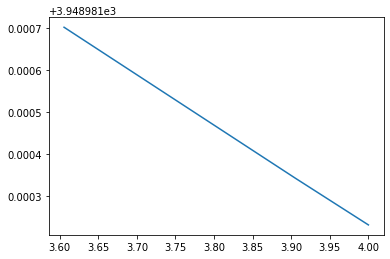

In [5]:
def getStats(fn, show = False):
    print(fn)
    text = open( fn, 'r' )
    names = []
    units = []
    for line in text:
        if 'name' in line:
            ind1 = line.find('=')
            ind2 = line.find(',')
            name = line[ind1+1:ind2]
        if 'units' in line:
            ind1 = line.find('=')
            ind2 = line.find(',')
            unit = line[ind1+1:ind2]
            if unit == '1':
                unit = ' '
            names.append( name )
            units.append( unit )
    if show:
        for i, n in enumerate(names):        
            print( i, n, ' [', units[i], ']' )
    stat = pd.read_csv( filepath_or_buffer = fn,
                        skiprows = 279, sep = '\\s+', names = names)
    return[stat, names, units]

[stats, names, un] = getStats('tests/testOPAL/macArthur.stat', True)

plt.plot(stats['s'], stats['energy'])
plt.show()

# New plots September 2021

spos =  [3.31627049]


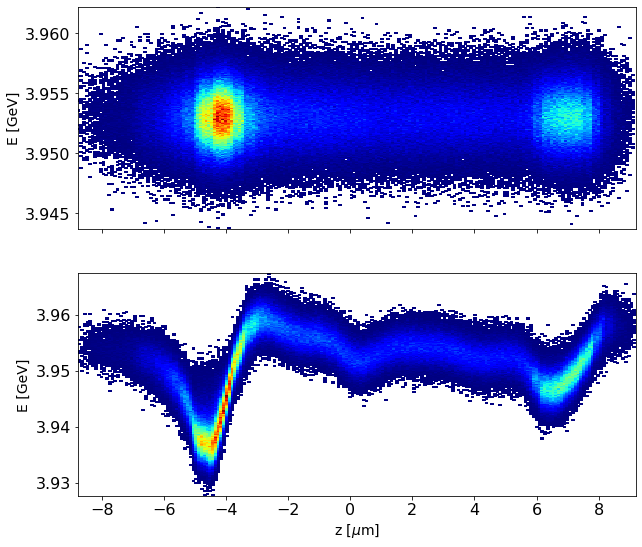

In [26]:
fn = 'tests/tests_September2021/wiggler/initialDistro.in'
df = pd.read_csv(fn, skiprows = 1, names = ['x', 'px', 'y', 'py', 'z', 'pz'], sep = '\t')
x = df['z']
y = df['pz'] * 511000
x -= np.mean(x)

fig, axs = plt.subplots(2,1,figsize=(10,9), sharex = True)
pmf.plotScreenXY(axs[0], x, y, ['z', 'E'], type = 'hist2d', factors = [1e6, 1e-9], 
                 nbins = 200, enable_cbar = 0)

fn = 'tests/tests_September2021/wiggler/macArthur.h5'
h5p = H5Parser()
h5p.parse(fn, False)
print('spos = ', h5p.getStepAttribute('SPOS', step = 0))
x = np.array(h5p.getStepDataset(dsetName = 'z', step = 0))
y = .511 * 1e6 * np.sqrt(1 + np.array(h5p.getStepDataset(dsetName = 'pz', step = 0))**2)
x -= np.mean(x)

pmf.plotScreenXY(axs[1], x, y, ['z', 'E'], type = 'hist2d', factors = [1e6, 1e-9], 
                 nbins = 200, enable_cbar = 0)

axs[0].set_xlabel('')
axs[1].tick_params( axis = 'both', labelsize = fs )
axs[0].tick_params( axis = 'both', labelsize = fs )
plt.savefig( (pltpath + '/LPS_before_after_paper.png'), bbox_inches='tight' )  
plt.show()

spos =  [3.31627049]


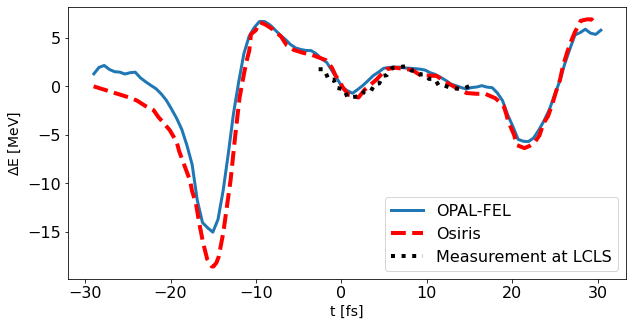

In [3]:
fn = 'tests/tests_September2021/wiggler/macArthur.h5'
h5p = H5Parser()
h5p.parse(fn, False)
print('spos = ', h5p.getStepAttribute('SPOS', step = 0))
x = np.array(h5p.getStepDataset(dsetName = 'z', step = 0))
y = .511 * 1e6 * np.sqrt(1 + np.array(h5p.getStepDataset(dsetName = 'pz', step = 0))**2)
# y -= np.mean(y)
x -= np.mean(x)
x /= -3e8  # m to s

fig, ax = plt.subplots(figsize = (10,5))
pmf.plotScreenXY(ax, x, y, ['t', 'E'], type = 'mod', factors = [-1e15,1e-6], nbins = 100, color = 0, lw = 3)

# Plot data from paper
shift = 29  # Shift data horizontally because I don't understand the convention to choose the center in the paper

osiris = pd.read_csv('paper/Osiris.csv', names = ['t', 'dE'])
osiris = osiris.sort_values( by = ['t']  )
ax.plot(osiris['t'] - shift, osiris['dE'], lw = 4, ls = '--', color = 'red')

meas = pd.read_csv('paper/Measurement.csv', names = ['t', 'dE'])
meas = meas.sort_values( by = ['t']  )
ax.plot(meas['t'] - shift, meas['dE'], lw = 4, ls = ':', color = 'black')
# ax.scatter(meas['t'] - shift, meas['dE'], s = 40, marker = 'o', color = 'k')

ax.legend(['OPAL-FEL', 'Osiris', 'Measurement at LCLS'], fontsize = fs)

ax.tick_params( axis = 'both', labelsize = fs )
plt.savefig( (pltpath + '/comparisonThesis_paper.png'), bbox_inches='tight' )    
plt.show()